# Introduction to Machine Learning
## Lecture 3 - Clustering
### Notebook 1: Simple Clustering with K-Means
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline

Let us create a sample dataset with labels. Ideally, we are not suppose to know the labels of the dataset since this is a clustering task. However, for a start, we will observe the efficiency of our model in clustering/grouping a dataset, which originally obtains class labels.

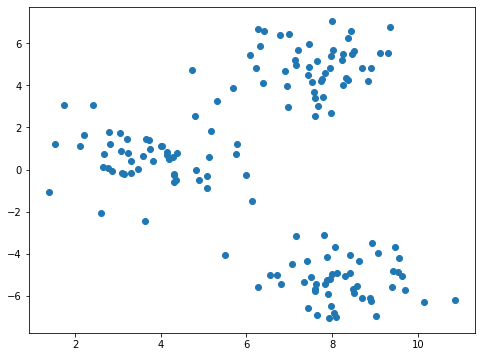

In [2]:
# Create random data points X and labels r
n_samples = 150
random_state = 150
X, r = make_blobs(n_samples=n_samples, random_state=random_state)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

The dataset X includes two features: x and y. These are the coordinates of our data points in 2D.

In [3]:
print(X.shape)

(150, 2)


Print the actual labels given for tha dataset, which are the clusters/groups or i.e., classses.

In [4]:
print("Original Cluster Labels:\n", r)

Original Cluster Labels:
 [1 0 0 0 0 1 2 1 2 1 1 2 1 0 2 1 0 1 2 0 0 2 0 1 1 1 0 0 0 1 1 1 1 1 0 2 1
 1 0 0 0 0 0 2 0 0 0 2 2 1 2 2 2 2 1 2 1 0 2 2 2 0 1 1 0 1 1 1 2 2 0 0 0 0
 2 1 2 0 1 1 2 2 2 2 1 2 1 2 2 2 2 2 2 0 1 0 1 0 2 1 0 0 1 1 2 2 1 0 1 2 2
 0 2 0 0 0 0 2 2 0 1 1 0 0 2 0 2 2 0 1 2 1 1 1 0 1 2 2 2 1 1 1 0 2 0 0 0 2
 1 1]


We can see that our dataset has two coordinates (x, y) and three clusters/groups. We will try to train our clustering model to learn the patterns in the dataset without using any prior information: **r**. This will be a unsupervised learning.

Let us apply clustering to the dataset using three clusters.

In [5]:
n_cluster = 3
k_means = KMeans(n_clusters=n_cluster, random_state=42)

# Fit the model and predict the cluster labels
predictions = k_means.fit_predict(X)

Since we define n_clusters=3, we will have three (3) cluster centers. Each center has a pair of x and y coordinates since the feature space has two columns in our dataset. You can think of the cluster centers as the mean values of the features (in this case, x and y) within the clusters.

In [6]:
# Create a data frame from the numpy arrays
data = pd.DataFrame(X)
# Change the columns names with x and y instead of the index numbers
data.columns = ["x", "y"]

# Create a column for the cluster labels in the frame
labels = k_means.labels_
data["Cluster"] = labels

# Display the cluster centers by taking the average of each feature within the cluster
data.groupby("Cluster").mean().round(3)

,x,y
Cluster,,
0,7.557,4.877
1,8.203,-5.249
2,3.736,0.512


Visualize the results

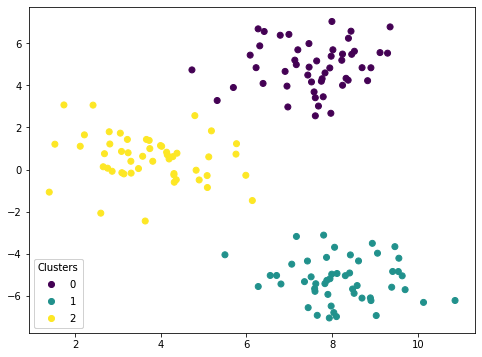

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

scatter = plt.scatter(X[:, 0], X[:, 1], c=predictions)

# Create a legend with the unique colors from the scatter
legend = ax.legend(
    *scatter.legend_elements(),
    loc="lower left", 
    title="Clusters",
)
ax.add_artist(legend)
plt.show()

Now, let us examine the optimal number of clusters that can best represent our data using a clustering evaluation metric: **Rand Index.** Remember that Rand Index can be used when the cluster labels are known (supervised). We will use different number of clusters to observe the error between the actual and predicted labels.

In [8]:
from sklearn.metrics import rand_score

In [9]:
cluster_list = np.arange(1, 11)
ri_list = list()

for n in cluster_list:
    k_means = KMeans(n_clusters=n, random_state=42)
    # Predict the cluster labels
    predictions = k_means.fit_predict(X)
    # Calculate the Rand Index
    ri = rand_score(r, predictions)
    ri_list.append(ri)

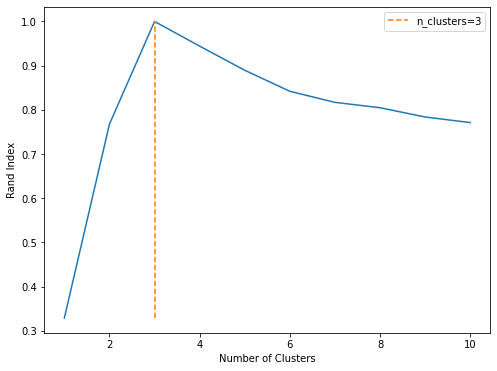

In [10]:
# Visualize results
plt.figure(figsize=(8, 6))
plt.plot(cluster_list, ri_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Rand Index")

# Mark the optimal point
a = [3, 3]
b = [np.min(ri_list), np.max(ri_list)]
plt.plot(a, b, linestyle="--", label="n_clusters=3")
plt.legend()

plt.show()

**Discussion:** Recall that Rand Index=1.0 refers to the optimal number of clusters. We say that three (3) clusters repserent our dataset in the best manner by only looking at the Rand Index. Note that we should evaluate our model in detail using another metrics to be confident about its efficiency.

# END